# フィボナッチ数列を題材に再起関数、デコレータを復習する。

## 0, 1, 1, 2, 3, 5, 8, ?

これはフィボナッチ数列というもので第n項をf(n)であらわすと、

## f(n) = f(n-1) + f(n-2) 

これを題材に再帰関数、デコレーターを学ぶ。

### 前提について整理

- 第0項は0、第1項は1
- 一般項f(n) を求める関数を作成する。つまり、ある関数に対してprint(f(10))とすると、フィボナッチ数列の第10項目が表示される。

漸化式f(n) = f(n-1) + f(n-2) をそのままPythonのコードにしてみる。<br>このように、関数内でその関数を呼び出すものを再帰関数という。

In [3]:
def f1(n):
    return f1(n-1) + f1(n-2)

In [4]:
f1(3)

RecursionError: maximum recursion depth exceeded

maximum recursion depth exceeded が出て終了している

In [5]:
def f2(n):
    if n < 2:
        return n
    return f2(n-1) + f2(n-2)

In [23]:
f2(35)

9227465

この記法だと、指数関数的に演算量が増えていく。

In [24]:
result_f2 = []
for n in range(35):
    result = %timeit -n1 -r1 -o -q f2(n)
    result_f2.append(result.best)

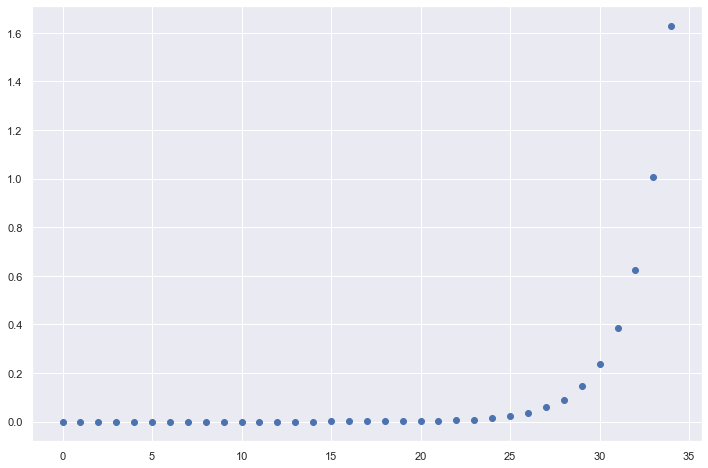

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(12,8))
plt.scatter(range(35), result_f2)
plt.show()

上の関数では、計算時間は指数関数的に増大する。→もう少し効率的な処理に変更する。
n = 5の場合、f(2)を山塊呼び出している。同じ計算を三回するのは無駄。一回目に結果を保存し、二回目以降に利用する場合は保存した結果を返す→キャッシュ化

In [15]:
# 初項を定義
cache_dict = {0:0, 1:1}
def f3(n):
    if n not in cache_dict:
        cache_dict[n] = f3(n-1) + f3(n-2)
    return cache_dict[n]

In [26]:
f3(35)

9227465

In [43]:
result_f3 = []
for n in range(35):
    # キャッシュをクリア
    cache_dict = {0:0, 1:1}
    result = %timeit -n1 -r1 -o -q f3(n)
    result_f3.append(result.best)

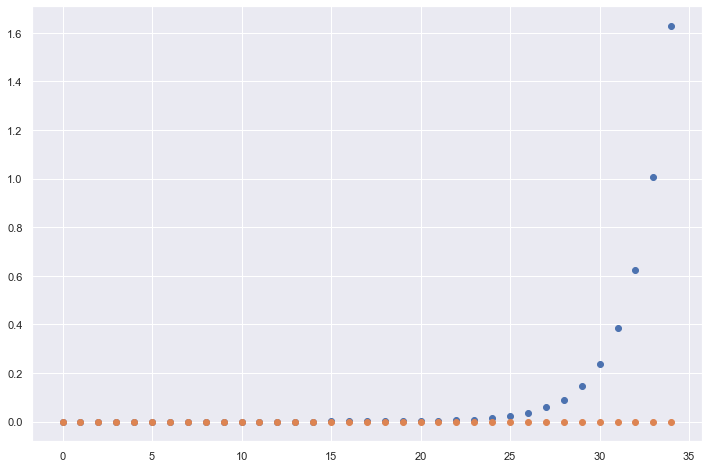

In [44]:
plt.figure(figsize=(12, 8))
plt.scatter(range(35), result_f2)
plt.scatter(range(35), result_f3)
plt.show()

少し工夫するだけで計算量が変わる。計算量=お金になる。アルゴリズムを学ぶ意義。

再帰的に実行する場合にキャッシュして計算量を削減したいというニーズは一般的にある。そのため、Pythonでは標準ライブラリとしてキャッシュ化するデコレータが提供されている。

In [45]:
from functools import lru_cache

@lru_cache(maxsize=None)
def f4(n):
    if n < 2:
        return n
    return f4(n-1) + f4(n-2)

In [46]:
f4(35)

9227465

In [49]:
result_f4 = []
for n in range(35):
    cache_dict = {0:0, 1:1}
    result = %timeit -n1 -r1 -o -q f3(n)
    result_f4.append(result.best)

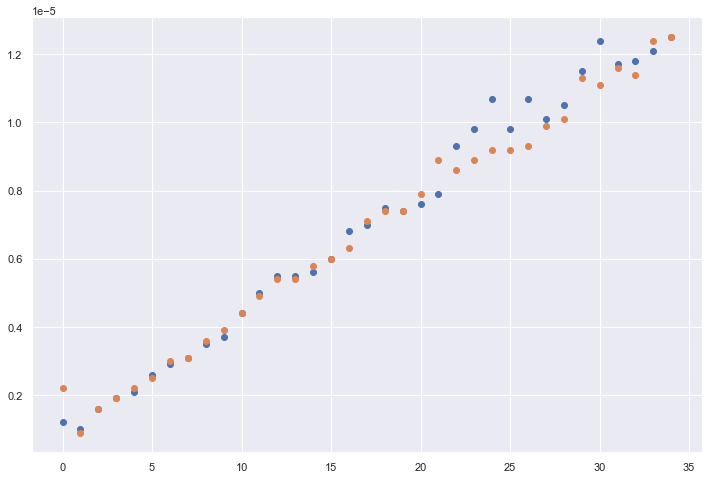

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(range(35), result_f3)
plt.scatter(range(35), result_f4)
plt.show()

f3とf4は計算時間は同じコード量だが、f4では簡潔に書くことができた。
デコレータ@lru_cacth　とは何だろうか。Pythonのデコレータについて考えていく。
デコレータとは簡潔に言うと、関数にデコレーションすることでその関数の挙動になんらかの拡張を加えるものである。
上の例の場合、f4という関数に対してデコレータ@lru_cacheはキャッシュという拡張を加えている。
もっと単純な例を見てみる。

In [51]:
def deco(func):
    def wrapper():
        print('--start--')
        func()
        print('--end--')
    return wrapper

@deco
def deco_test():
    print('Hello Decorator')

In [52]:
deco_test()

--start--
Hello Decorator
--end--


deco_testを書き換えてみる。

In [55]:
def deco(func):
    def wrapper():
        print('--start--')
        func()
        print('--end--')
    return wrapper

def deco_test():
    print('Hello Decorator')
    
deco_test2 = deco(deco_test)

In [56]:
deco_test2()

--start--
Hello Decorator
--end--


## ジェネレータを用いたフィボナッチ数列の生成

In [17]:
def f5():
    a, b = 0, 1
    while 1:
        yield b
        a, b = b, a+b

In [20]:
next(f5())

1